In [2]:
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [3]:
files_1 = glob.glob("*/nstates_40/nep_100/rep_0/preds.feather")

In [5]:
files_1

['1a_lstm_metab_just_metab/nstates_40/nep_100/rep_0/preds.feather',
 '2_metab_multitask/nstates_40/nep_100/rep_0/preds.feather',
 '1_lstm_metab/nstates_40/nep_100/rep_0/preds.feather',
 '1c_lstm_metab_do_and_gas/nstates_40/nep_100/rep_0/preds.feather',
 '1b_lstm_metab_just_do/nstates_40/nep_100/rep_0/preds.feather']

In [7]:
def plot_obs_preds(pred_file, obs_file, site_id, start_date, end_date, outfile=None, info_dict=None):
    df_pred = pd.read_feather(pred_file)
    df_pred_site = df_pred.query(f"site_id == '{site_id}'")
    df_obs_site = xr.open_zarr(obs_file).sel(site_id=site_id).to_dataframe()
    df_pred_site = df_pred_site.set_index('date')
    df_obs_site = df_obs_site.reset_index().set_index('date')[df_pred_site.columns]
    df_obs_site['type'] = 'obs'
    df_pred_site['type'] = 'pred'
    df_comb = pd.concat([df_obs_site, df_pred_site])
    del df_comb['site_id']
    df_comb = df_comb.loc[start_date: end_date]
    df_comb = df_comb.reset_index().melt(id_vars=["date", "type"])
    pl = sns.relplot(x = "date", y="value", row="variable", hue="type", data=df_comb, kind='line', height=1, aspect=5, facet_kws={'sharey': False}, palette=["black", "steelblue"])
    pl.set_ylabels()
    if info_dict:
        info_text = "\n".join([f"{key}: {val}" for key, val in info_dict.items()])
        plt.figtext(0.9, 0.05, info_text, ha='left', va='bottom', bbox={'facecolor': 'white', 'pad': 10})
    if outfile:
        plt.savefig(outfile, dpi=300)
    return pl
    
    
    

In [6]:
site_id = "01472104"

1a_lstm_metab_just_metab/nstates_40/nep_100/rep_0/preds.feather
2_metab_multitask/nstates_40/nep_100/rep_0/preds.feather
1_lstm_metab/nstates_40/nep_100/rep_0/preds.feather
1c_lstm_metab_do_and_gas/nstates_40/nep_100/rep_0/preds.feather
1b_lstm_metab_just_do/nstates_40/nep_100/rep_0/preds.feather


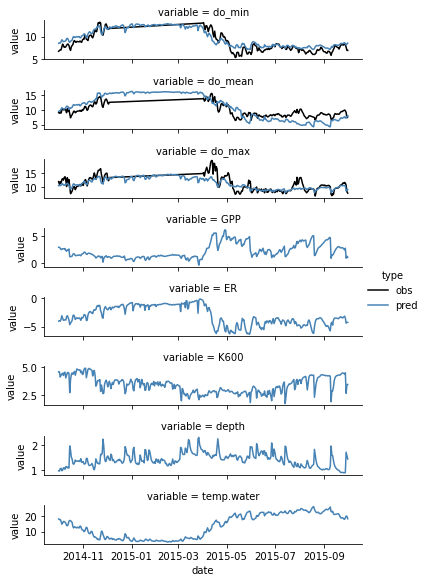

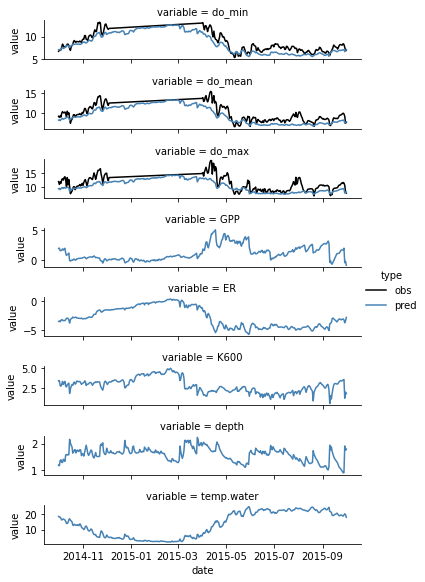

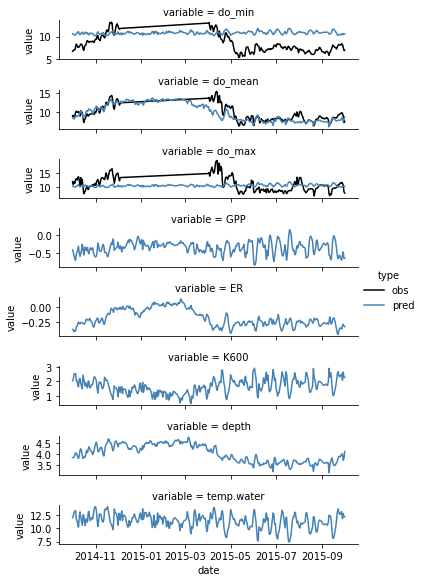

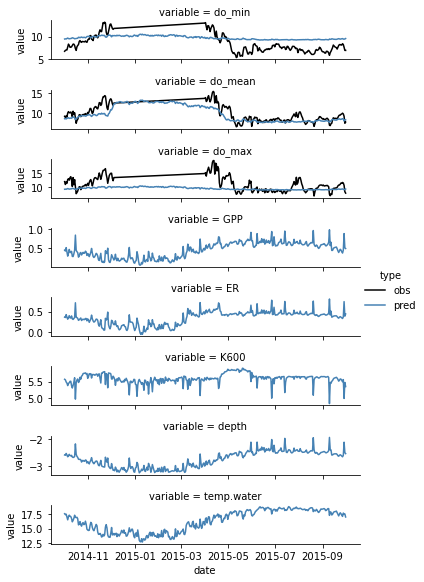

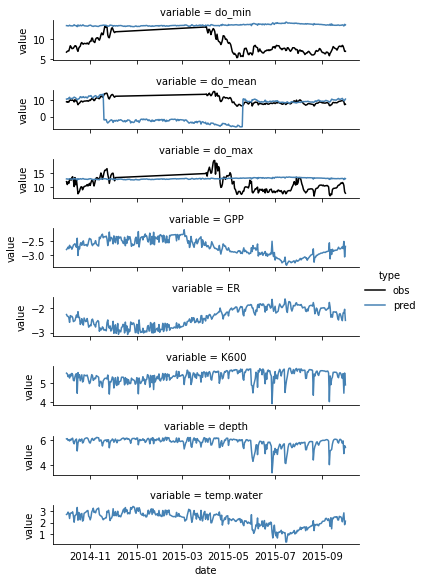

In [12]:
for f in files_1:
    print(f)
    plot_obs_preds(f, "../well_obs_targets.zarr", site_id, "2014-10-01", "2015-10-01")

        date type variable  value
0 2012-01-01  obs   do_min    NaN
1 2012-01-02  obs   do_min    NaN
2 2012-01-03  obs   do_min    NaN
3 2012-01-04  obs   do_min    NaN
4 2012-01-05  obs   do_min    NaN


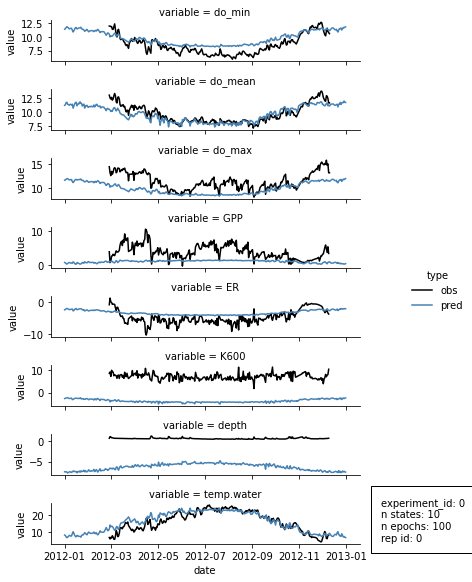

In [40]:
pl = plot_obs_preds("nstates_40/nep_400/rep_0/trn_preds.feather", "../../well_obs_targets.zarr/", site_id, "2012-01-01", "2012-12-31", info_dict=info_dict)

In [8]:
pl.set_ylabels?

Signature: pl.set_ylabels(label=None, clear_inner=True, **kwargs)
Docstring: Label the y axis on the left column of the grid.
File:      ~/miniconda3/envs/multitask_paper/lib/python3.6/site-packages/seaborn/axisgrid.py
Type:      method


In [6]:
df_10_100.set_index("date", inplace=True)

In [7]:
df_site = df_10_100.loc["2009"].query(f"site_id == '{site_id}'")

In [8]:
del df_site['site_id']

In [9]:
df_site

,do_min,do_mean,do_max,GPP,ER,K600,depth,temp.water
date,,,,,,,,
2009-01-01,11.920588,12.082155,11.953962,0.103457,-2.003561,-2.292735,-7.319335,6.545976
2009-01-02,11.972080,11.682030,12.081514,0.323858,-2.056795,-2.088155,-7.708322,6.339816
2009-01-03,12.027393,11.888909,12.137620,0.339844,-1.998505,-2.247623,-7.481566,6.198920
2009-01-04,11.929711,11.703917,12.055628,0.400014,-2.049837,-2.280539,-7.521151,6.517154
2009-01-05,11.730264,11.459734,11.892884,0.557877,-2.179671,-2.400547,-7.562182,7.190979
...,...,...,...,...,...,...,...,...
2009-12-27,11.627990,11.668950,11.779376,0.505919,-2.497946,-2.466964,-7.177511,7.450427
2009-12-28,11.804972,12.052171,11.891938,0.278947,-2.223456,-2.403287,-7.177619,6.896114
2009-12-29,11.902741,12.236094,11.919371,0.049494,-2.111386,-2.246740,-7.187287,6.556187


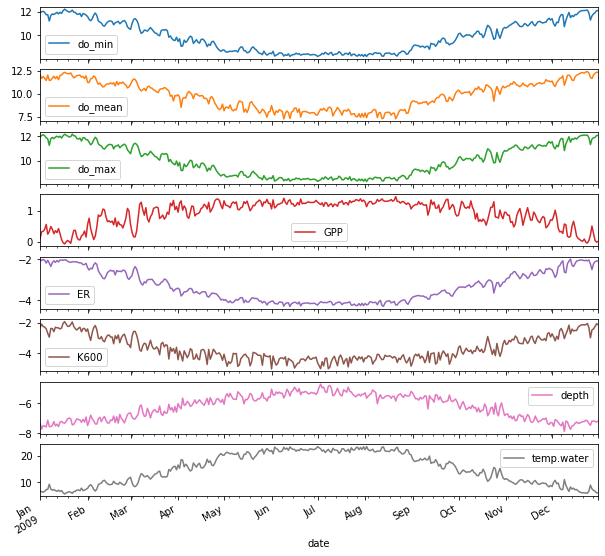

In [32]:
axs = df_site.plot(subplots=True, figsize=(10, 10))

In [35]:
a = axs[0]

In [45]:
d = df_site.reset_index().melt(id_vars="date")

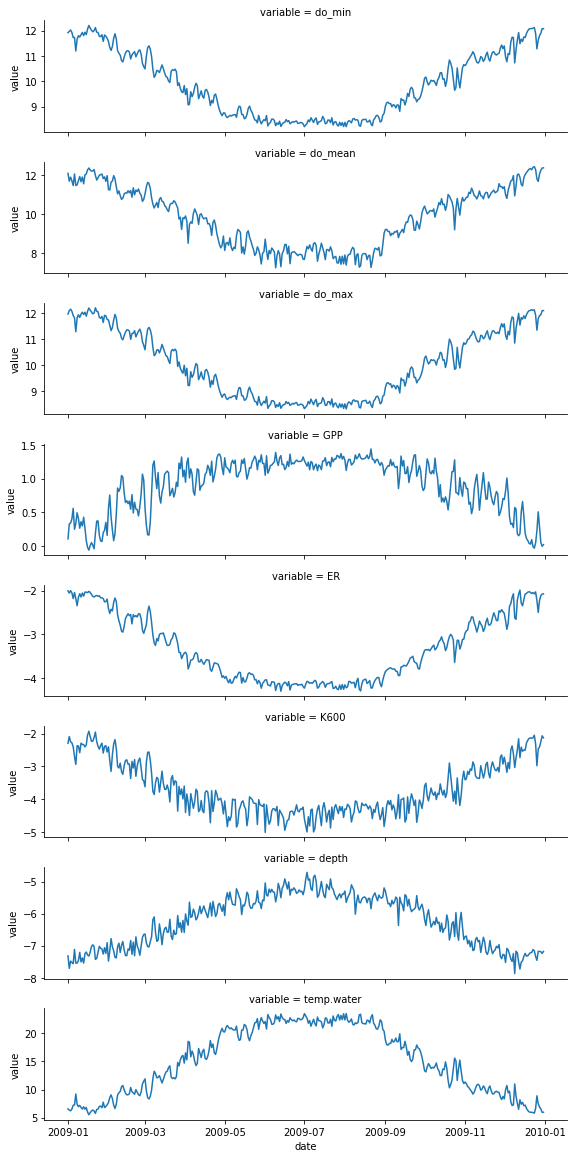

In [56]:
sns.relplot(x = "date", y="value", row="variable", data=d, kind='line', height=2, aspect=4, facet_kws={'sharey': False})

In [11]:
ds_targets = xr.open_zarr("../../well_obs_targets.zarr/")

In [12]:
df_obs = ds_targets.to_dataframe()

In [13]:
df_obs[df_site.columns].reset_index().set_index('date').query(f"site_id == '{site_id}'").loc['2012']

,site_id,do_min,do_mean,do_max,GPP,ER,K600,depth,temp.water
date,,,,,,,,,
2012-01-01,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2012-12-27,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-28,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-29,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ds_site = ds_targets.sel(site_id = site_id)

In [15]:
ds_site

<xarray.Dataset>
Dimensions:       (date: 13833)
Coordinates:
  * date          (date) datetime64[ns] 1979-10-01 1979-10-02 ... 2021-12-19
    site_id       <U8 '01480870'
Data variables: (12/37)
    DO.amp        (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    DO.obs        (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    DO.psat       (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    DO.sat        (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    DO.tdist80    (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    ER            (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    ...            ...
    resolution    (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    segidnat      (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    shortwave     (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    site_name     (date) object dask.array<chunksize=(6917,), meta=np.ndarray>
    temp.water    (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>
    velocity      (date) float64 dask.array<chunksize=(6917,), meta=np.ndarray>

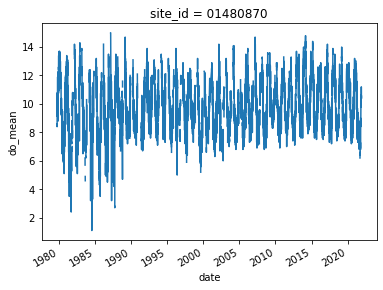

In [17]:
ds_site['do_mean'].plot()

In [18]:
df_targets = ds_targets.to_dataframe()

In [30]:
df_targets.query(f"site_id == '{site_id}'").reset_index().set_index('date').loc['2012']

,site_id,DO.amp,DO.obs,DO.psat,DO.sat,DO.tdist80,ER,ER.Rhat,ER.lower,ER.n_eff,...,discharge,do_max,do_mean,do_min,resolution,segidnat,shortwave,site_name,temp.water,velocity
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-02,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-03,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-04,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-05,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-06,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-07,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-08,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
2012-01-09,01480870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN
